In [73]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [74]:
import matplotlib.pyplot as plt
def loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    #plt.legend(['Train'], loc='upper right')

In [75]:
data = pd.read_csv('../assignment 3/data/q2_dataset.csv')

In [76]:
data.columns = data.columns.str.strip()
list(data.columns)

['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

In [72]:
df = data[::-1].reset_index(drop=True)
df

,Date,Close/Last,Volume,Open,High,Low
0,07/09/15,$120.07,78291510,123.85,124.06,119.22
1,07/10/15,$123.28,61292800,121.94,123.85,121.21
2,07/13/2015,$125.66,41365600,125.03,125.76,124.32
3,07/14/2015,$125.61,31695870,126.04,126.37,125.04
4,07/15/2015,$126.82,33559770,125.72,127.15,125.58
...,...,...,...,...,...,...
1254,07/01/20,$364.11,27684310,365.12,367.36,363.91
1255,07/02/20,$364.11,28510370,367.85,370.47,363.64
1256,07/06/20,$373.85,29663910,370.00,375.78,369.87
1257,07/07/20,$372.69,28106110,375.41,378.62,372.23


In [77]:
data['target']= data['Open']
data['Date'] =pd.to_datetime(data.Date)
data=data.sort_values(by='Date')
data.head()

,Date,Close/Last,Volume,Open,High,Low,target
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72


In [78]:
for i in range(50):
    i_str = str(i)
    data['Volume_t-'+i_str] = data.shift(i)['Volume']
for i in range(50):
    i_str = str(i)
    data['Open_t-'+i_str] = data.shift(i)['Open']
for i in range(50):
    i_str = str(i)
    data['High_t-'+i_str] = data.shift(i)['High']
for i in range(50):
    i_str = str(i)
    data['Low_t-'+i_str] = data.shift(i)['Low']
data.head(15)

/var/folders/xg/x9dp1h1x32q36fc2kpxyxd180000gn/T/ipykernel_3585/67309478.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Open_t-'+i_str] = data.shift(i)['Open']
/var/folders/xg/x9dp1h1x32q36fc2kpxyxd180000gn/T/ipykernel_3585/67309478.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data['High_t-'+i_str] = data.shift(i)['High']
/var/folders/xg/x9dp1h1x32q36fc2kpxyxd180000gn/T/ipykernel_3585/67309478.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  

,Date,Close/Last,Volume,Open,High,Low,target,Volume_t-0,Volume_t-1,Volume_t-2,...,Low_t-40,Low_t-41,Low_t-42,Low_t-43,Low_t-44,Low_t-45,Low_t-46,Low_t-47,Low_t-48,Low_t-49
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85,78291510,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94,61292800,78291510.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03,41365600,61292800.0,78291510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04,31695870,41365600.0,61292800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72,33559770,31695870.0,41365600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,2015-07-16,$128.51,35987630,127.74,128.57,127.35,127.74,35987630,33559770.0,31695870.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,2015-07-17,$129.62,45970470,129.08,129.62,128.31,129.08,45970470,35987630.0,33559770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,2015-07-20,$132.07,55204920,130.97,132.97,130.70,130.97,55204920,45970470.0,35987630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250,2015-07-21,$130.75,73006780,132.85,132.92,130.32,132.85,73006780,55204920.0,45970470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1249,2015-07-22,$125.22,115288400,121.99,125.50,121.99,121.99,115288400,73006780.0,55204920.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
data = data.drop(['Close/Last','Volume','Open','High','Low'], axis = 1)
data.head()

,Date,target,Volume_t-0,Volume_t-1,Volume_t-2,Volume_t-3,Volume_t-4,Volume_t-5,Volume_t-6,Volume_t-7,...,Low_t-40,Low_t-41,Low_t-42,Low_t-43,Low_t-44,Low_t-45,Low_t-46,Low_t-47,Low_t-48,Low_t-49
1258,2015-07-09,123.85,78291510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2015-07-10,121.94,61292800,78291510.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,2015-07-13,125.03,41365600,61292800.0,78291510.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,2015-07-14,126.04,31695870,41365600.0,61292800.0,78291510.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1254,2015-07-15,125.72,33559770,31695870.0,41365600.0,61292800.0,78291510.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
data.isna().sum()

Date           0
target         0
Volume_t-0     0
Volume_t-1     1
Volume_t-2     2
              ..
Low_t-45      45
Low_t-46      46
Low_t-47      47
Low_t-48      48
Low_t-49      49
Length: 202, dtype: int64

In [81]:
#drop columns with null values
data = data.dropna()
data.head()

,Date,target,Volume_t-0,Volume_t-1,Volume_t-2,Volume_t-3,Volume_t-4,Volume_t-5,Volume_t-6,Volume_t-7,...,Low_t-40,Low_t-41,Low_t-42,Low_t-43,Low_t-44,Low_t-45,Low_t-46,Low_t-47,Low_t-48,Low_t-49
1209,2015-09-17,115.66,63712340,37080720.0,43218350.0,58279570.0,49793750.0,62800770.0,84757780.0,54507300.0,...,121.99,130.32,130.70,128.31,127.35,125.58,125.04,124.32,121.21,119.22
1208,2015-09-18,112.21,73991000,63712340.0,37080720.0,43218350.0,58279570.0,49793750.0,62800770.0,84757780.0,...,125.06,121.99,130.32,130.70,128.31,127.35,125.58,125.04,124.32,121.21
1207,2015-09-21,113.67,46594220,73991000.0,63712340.0,37080720.0,43218350.0,58279570.0,49793750.0,62800770.0,...,123.90,125.06,121.99,130.32,130.70,128.31,127.35,125.58,125.04,124.32
1206,2015-09-22,113.38,50278030,46594220.0,73991000.0,63712340.0,37080720.0,43218350.0,58279570.0,49793750.0,...,122.12,123.90,125.06,121.99,130.32,130.70,128.31,127.35,125.58,125.04
1205,2015-09-23,113.63,35678360,50278030.0,46594220.0,73991000.0,63712340.0,37080720.0,43218350.0,58279570.0,...,122.55,122.12,123.90,125.06,121.99,130.32,130.70,128.31,127.35,125.58


In [82]:
from sklearn.model_selection import train_test_split
#split the data into train and test set
train, test = train_test_split(data, test_size=0.30, random_state=0)



In [83]:
#separate features and target
X_train = train.drop(['Date','target'], axis = 1)
y_train = train['target']
X_test_date = test
X_test = test.drop(['Date','target'], axis = 1)
y_test = test['target']

In [84]:
#scale the data 
#scaling the dataset using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [85]:
#numpy array conversion
X_train=np.array(X_train)
X_test=np.array(X_test)

In [86]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [87]:
X_train.shape[0],X_train.shape[1]


(847, 200)

In [88]:
X_test.shape[0],X_test.shape[1]


(363, 200)

In [89]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [90]:
model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(300, return_sequences=True, input_shape=(12,1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(150, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(150),
    tf.keras.layers.Dropout(0.3),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [91]:
model.compile(loss='mean_squared_error',optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [92]:
%%time
history = model.fit(X_train,y_train,validation_split=0.05,epochs=10,batch_size=64,verbose=1)


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/13 [==============================] - ETA: 0s - loss: 33982.8993WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x29c5ec0d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach

In [93]:
print('Training MSE for Model 1', model.evaluate(X_train, y_train, verbose=0))

Training MSE for Model 1 23420.771484375


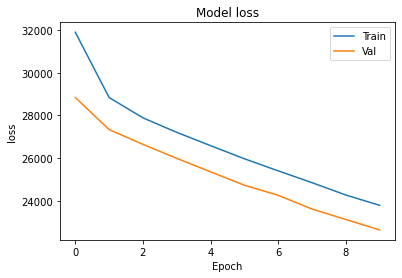

In [94]:
loss_plot(history)

In [95]:
y_test=np.array(y_test)
y_pred = model.predict(X_test, verbose = 0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [96]:
mean_squared_error(y_pred, y_test)

25433.285117902713

In [97]:
score = model.evaluate(X_test, y_test, verbose=False) 
print('Metric Names',model.metrics_names)
print('Test Score:', score)


Metric Names ['loss']
Test Score: 25433.283203125


In [98]:
score = model.evaluate(X_train, y_train, verbose=False) 
print('Metric Names',model.metrics_names)
print('Training Score:', score)

Metric Names ['loss']
Training Score: 23420.771484375


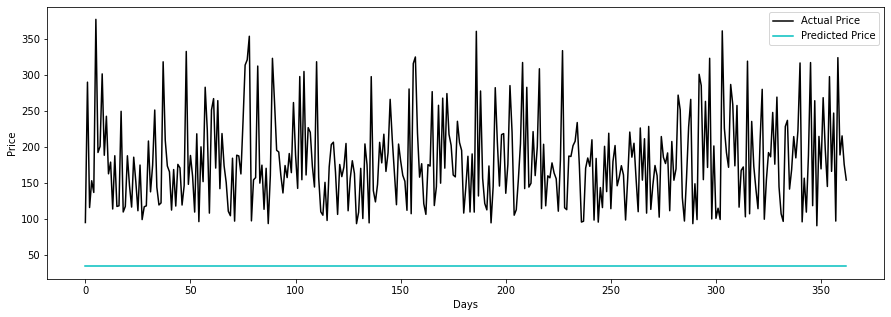

In [100]:
plt.figure(figsize = (15,5))
plt.plot(y_test, c='k')
plt.plot(y_pred, c='c')
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend(["Actual Price", "Predicted Price"])
plt.show()

In [62]:
result_array=pd.DataFrame({'y_test':y_test, 'y_predicted':y_pred.ravel(),'Date':X_test_date["Date"]},index=None)


In [63]:
#result_array = result_array.sort_values(by=['Date'])
result_array=result_array.reset_index(drop=True, inplace=False)
result_array

,y_test,y_predicted,Date
0,94.44,33.59227,2016-06-30
1,289.46,33.59227,2019-12-30
2,115.29,33.59227,2015-12-04
3,152.50,33.59227,2019-01-10
4,136.23,33.59227,2017-02-21
...,...,...,...
358,323.52,33.59227,2020-02-05
359,188.38,33.59227,2018-05-22
360,214.84,33.59227,2019-09-09
361,175.24,33.59227,2018-03-20


In [64]:
result_array['Date'] =pd.to_datetime(result_array.Date)


In [65]:
result_array=result_array.sort_values(by='Date')
result_array

,y_test,y_predicted,Date
205,112.21,33.59227,2015-09-18
320,113.67,33.59227,2015-09-21
13,113.25,33.59227,2015-09-24
85,112.83,33.59227,2015-09-29
183,109.07,33.59227,2015-10-01
...,...,...,...
227,333.25,33.59227,2020-06-15
303,360.70,33.59227,2020-06-25
78,353.25,33.59227,2020-06-29
186,360.08,33.59227,2020-06-30


In [66]:
result_array=result_array.reset_index(drop=True, inplace=False)

Text(0.5, 1.0, 'Stock price over time')

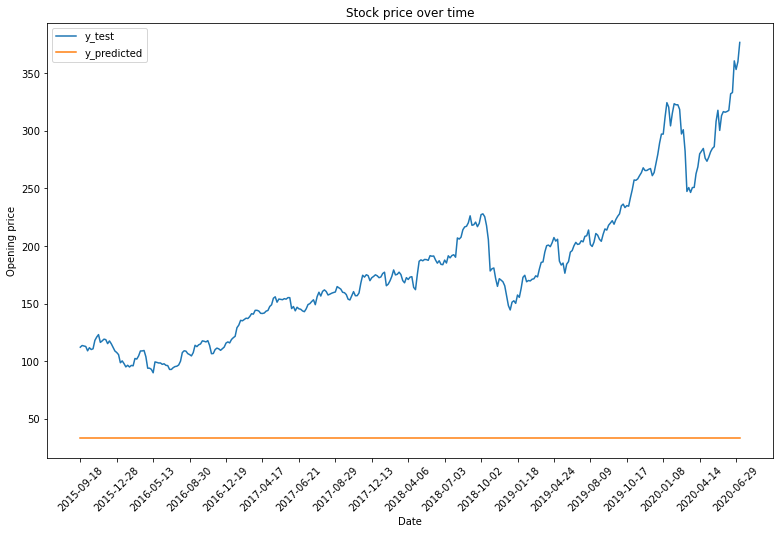

In [67]:
result_array.iloc[0:,0:2].plot.line(figsize=(13,8))
plt.xticks(np.arange(0, 377, step=20), result_array["Date"].dt.date.iloc[lambda x: x.index % 20 == 0],rotation=45)
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.title('Stock price over time')